<a href="https://colab.research.google.com/github/anitharahul01/anitha/blob/main/beer_servingregression_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv("/beer-servings.csv")
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    193 non-null    int64  
 1   country                       193 non-null    object 
 2   beer_servings                 185 non-null    float64
 3   spirit_servings               185 non-null    float64
 4   wine_servings                 187 non-null    float64
 5   total_litres_of_pure_alcohol  192 non-null    float64
 6   continent                     193 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 10.7+ KB
None
   Unnamed: 0      country  beer_servings  spirit_servings  wine_servings  \
0           0  Afghanistan            0.0              0.0            0.0   
1           1      Albania           89.0            132.0           54.0   
2           2      Algeria           25.0              0.0        

In [116]:
data=pd.get_dummies(data)
data.columns
data.shape
data = pd.get_dummies(data, dtype = int)
data.isna().sum()
data = data.fillna(0)

In [117]:
data.head()

,Unnamed: 0,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,country_Afghanistan,country_Albania,country_Algeria,country_Andorra,country_Angola,...,country_Vietnam,country_Yemen,country_Zambia,country_Zimbabwe,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America
0,0,0.0,0.0,0.0,0.0,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,1,89.0,132.0,54.0,4.9,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,2,25.0,0.0,14.0,0.7,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
3,3,245.0,138.0,312.0,12.4,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
4,4,217.0,57.0,45.0,5.9,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False


In [118]:
x = data.drop(['total_litres_of_pure_alcohol'], axis = 1)
y = data['total_litres_of_pure_alcohol']

In [119]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, test_size = 0.25)

In [120]:
print(y_train.unique())
print(y_train.dtype)

[ 6.7  4.   1.3  0.5  6.2  4.7  0.1  5.8 10.6  2.   4.4  0.3  6.6  0.
  4.3  7.   2.8  0.7  0.8 10.5  5.   5.4  8.7  6.8  6.3  0.2  8.3  0.6
  5.9  8.2  9.1  3.5  9.8  8.9  3.1 10.4  1.1  7.7  9.4  1.4 10.3  7.2
 11.5 11.4  2.6  3.4  1.7  2.2  0.9  2.3  1.9  4.2 11.8  1.8  7.3 12.4
  6.1  6.4  1.   2.5  0.4  3.8  2.4  6.5  3.9  1.5  7.1  4.6  9.5 10.
  6.9  1.2  4.9  9.6  3.   9.3]
float64


In [121]:
#1 Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
y_train=y_train.astype('int')
y_test=y_test.astype('int')
log_reg = log_reg.fit(x_train, y_train)
y_pred = log_reg.predict(x_test)
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
print('Accuracy is: ',accuracy_score(y_test,y_pred))
print('Precision is: ',precision_score(y_test,y_pred,average='macro'))
print('Recall is: ',recall_score(y_test,y_pred,average='macro'))
print('F1 score is: ',f1_score(y_test,y_pred,average='macro'))

Accuracy is:  0.32653061224489793
Precision is:  0.1672161172161172
Recall is:  0.21245421245421242
F1 score is:  0.1692890442890443


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [122]:
confusion_matrix(y_test,y_pred)

array([[6, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 3, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 2, 0, 0, 0, 4, 0, 0, 0],
       [0, 0, 0, 0, 0, 2, 0, 0, 0, 4, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]])

In [123]:
y_pred

array([10,  2,  6,  6,  6,  6,  5,  4, 10, 10,  0,  6,  1, 10,  2,  2,  1,
        6,  0,  6,  0,  6,  1,  6, 10,  1,  2,  6, 10,  0,  0,  2,  2,  0,
        0,  6,  6,  6, 10,  2,  6,  7, 11, 10, 10,  0,  0, 11, 10])

In [124]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
model = nb_classifier.fit(x_train, y_train)
y_preds = model.predict(x_test)
confusion_matrix(y_test,y_preds)
print('Accuracy is: ',accuracy_score(y_test,y_preds))
print('Precision is: ',precision_score(y_test,y_preds,average='macro'))
print('Recall is: ',recall_score(y_test,y_preds,average='macro'))
print('F1 score is: ',f1_score(y_test,y_preds,average='macro'))

Accuracy is:  0.10204081632653061
Precision is:  0.012755102040816327
Recall is:  0.05952380952380953
F1 score is:  0.02100840336134454


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [125]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = np.arange(3,15)
for k in neighbors:
   knn = KNeighborsClassifier(n_neighbors = k, metric = 'euclidean')
   knn.fit(x_train,y_train)
   y_predictions = knn.predict(x_test)
   acc = accuracy_score(y_test, y_predictions)
   metric_k.append(acc)


In [126]:
   metric_k

[0.3877551020408163,
 0.3673469387755102,
 0.40816326530612246,
 0.3673469387755102,
 0.3673469387755102,
 0.3877551020408163,
 0.3877551020408163,
 0.3469387755102041,
 0.32653061224489793,
 0.3877551020408163,
 0.3469387755102041,
 0.32653061224489793]

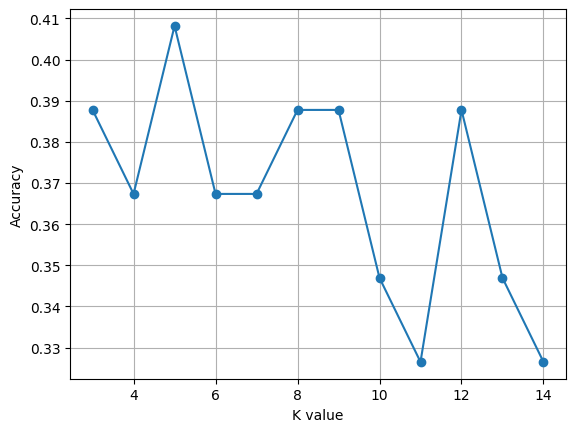

In [127]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.grid()

In [128]:
knn = KNeighborsClassifier(n_neighbors = 7, metric = 'euclidean')
knn.fit(x_train,y_train)
y_predictions = knn.predict(x_test)

In [129]:
print('Accuracy is :',accuracy_score(y_test,y_predictions))
print('Precision is :',precision_score(y_test,y_predictions,average='macro'))
print('Recall is :',recall_score(y_test,y_predictions,average='macro'))
print('F1 Score is :',f1_score(y_test,y_predictions,average='macro'))

Accuracy is : 0.3673469387755102
Precision is : 0.26634615384615384
Recall is : 0.2866300366300366
F1 Score is : 0.24233100233100233


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [130]:
confusion_matrix(y_test,y_predictions)

array([[9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [6, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 0, 0, 0],
       [0, 0, 0, 0, 0, 3, 0, 1, 0, 2, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]])

In [131]:
#Support Vector Machine
from sklearn.svm import SVC
svm_cls = SVC(kernel = 'rbf')

In [132]:
svm_cls = svm_cls.fit(x_train, y_train)

In [133]:
y_pred_svm = svm_cls.predict(x_test)

In [134]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
confusion_matrix(y_test, y_pred_svm)

array([[9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 5, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 5, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]])

In [135]:
accuracy_score(y_test, y_pred_svm)

0.3877551020408163

In [136]:
recall_score(y_test, y_pred_svm, average='macro')

0.2371794871794872

In [137]:
precision_score(y_test, y_pred_svm,average='macro')

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


0.1987179487179487

In [138]:
#2 Decision Tree
from sklearn.tree import DecisionTreeClassifier


In [139]:
dt_cls = DecisionTreeClassifier()

In [140]:
dt_cls = dt_cls.fit(x_train,y_train)

In [141]:
y_pred_dt = dt_cls.predict(x_test)

In [142]:
confusion_matrix(y_test,y_pred_dt)

array([[7, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [1, 2, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 3, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]])

In [143]:
accuracy_score(y_test,y_pred_dt)

0.32653061224489793

In [144]:
precision_score(y_test,y_pred_dt,average='macro')

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


0.1994047619047619

3 Random Forest

In [145]:
from sklearn.ensemble import RandomForestClassifier

In [146]:
rf_cls = RandomForestClassifier()
rf_cls = rf_cls.fit(x_train,y_train)

In [147]:
 y_pred_rf = rf_cls.predict(x_test)
 confusion_matrix(y_test,y_pred_rf)

array([[9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [2, 3, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 5, 0, 0, 0],
       [0, 0, 0, 0, 0, 2, 0, 1, 0, 3, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]])

In [148]:
accuracy_score(y_test,y_pred_rf)

0.42857142857142855